<a href="https://colab.research.google.com/github/ericlesrisso/Case-Aluguel-Brasil/blob/main/C%C3%B3pia_de_Case_Aluguel_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Metricas do CASE
# Media de aluguel nas cidades --- OK
# Cidades com maiores alugueis --- OK
# Cidade mais pet friendly --- OK
# Escolher 1 imovel em pelo menos 5 cidades --- OK
# Até 100mt2, com 2 quartos, com vaga de garagem para um carro, aceita pet, mobiliado e com um total de até 2000,00
# Imovel para um casal com 1 filho --- OK

In [25]:
import pandas as pd
import seaborn as sns

In [26]:
aluguel_brasil = pd.read_csv('/content/Aluguel_Brasil.csv')
aluguel_brasil.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [27]:
# Renomeando colunas para uma melhor visualização do DF
aluguel_brasil = aluguel_brasil.rename(columns={'city':'Cidade','area':'Área','rooms':'Quartos','bathroom':'Banheiros','parking spaces':'Vagas de Garagem','floor':'Andar','animal':'Animais','furniture':'Mobiliado','hoa (R$)':'Condomínio','rent amount (R$)':'Valor Aluguel','property tax (R$)':'Imposto','fire insurance (R$)':'Seguro','total (R$)':'Total'})
aluguel_brasil.head()

,Cidade,Área,Quartos,Banheiros,Vagas de Garagem,Andar,Animais,Mobiliado,Condomínio,Valor Aluguel,Imposto,Seguro,Total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [28]:
aluguel_brasil.dtypes

Cidade              object
Área                 int64
Quartos              int64
Banheiros            int64
Vagas de Garagem     int64
Andar               object
Animais             object
Mobiliado           object
Condomínio           int64
Valor Aluguel        int64
Imposto              int64
Seguro               int64
Total                int64
dtype: object

In [29]:
aluguel_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cidade            10692 non-null  object
 1   Área              10692 non-null  int64 
 2   Quartos           10692 non-null  int64 
 3   Banheiros         10692 non-null  int64 
 4   Vagas de Garagem  10692 non-null  int64 
 5   Andar             10692 non-null  object
 6   Animais           10692 non-null  object
 7   Mobiliado         10692 non-null  object
 8   Condomínio        10692 non-null  int64 
 9   Valor Aluguel     10692 non-null  int64 
 10  Imposto           10692 non-null  int64 
 11  Seguro            10692 non-null  int64 
 12  Total             10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [30]:
pd.set_option('float_format','{:.2f}'.format)
aluguel_brasil.describe()

,Área,Quartos,Banheiros,Vagas de Garagem,Condomínio,Valor Aluguel,Imposto,Seguro,Total
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


In [31]:
# Corrigindo os tipos de dados das colunas
aluguel_brasil = aluguel_brasil.astype({"Área":"float","Valor Aluguel":"float","Imposto":"float","Seguro":"float","Condomínio":"float","Total":"float"})
aluguel_brasil.dtypes

Cidade               object
Área                float64
Quartos               int64
Banheiros             int64
Vagas de Garagem      int64
Andar                object
Animais              object
Mobiliado            object
Condomínio          float64
Valor Aluguel       float64
Imposto             float64
Seguro              float64
Total               float64
dtype: object

In [32]:
aluguel_brasil.head()

,Cidade,Área,Quartos,Banheiros,Vagas de Garagem,Andar,Animais,Mobiliado,Condomínio,Valor Aluguel,Imposto,Seguro,Total
0,São Paulo,70.00,2,1,1,7,acept,furnished,2065.00,3300.00,211.00,42.00,5618.00
1,São Paulo,320.00,4,4,0,20,acept,not furnished,1200.00,4960.00,1750.00,63.00,7973.00
2,Porto Alegre,80.00,1,1,1,6,acept,not furnished,1000.00,2800.00,0.00,41.00,3841.00
3,Porto Alegre,51.00,2,1,0,2,acept,not furnished,270.00,1112.00,22.00,17.00,1421.00
4,São Paulo,25.00,1,1,0,1,not acept,not furnished,0.00,800.00,25.00,11.00,836.00


In [33]:
# Cidades com maiores medias de aluguel
# Fazer grafico de colunas

agg_total = aluguel_brasil.groupby(['Cidade'])['Total'].agg('mean').sort_values(ascending=False).reset_index()
agg_total

,Cidade,Total
0,São Paulo,6380.83
1,Belo Horizonte,6315.24
2,Rio de Janeiro,4611.68
3,Campinas,3173.28
4,Porto Alegre,2989.78


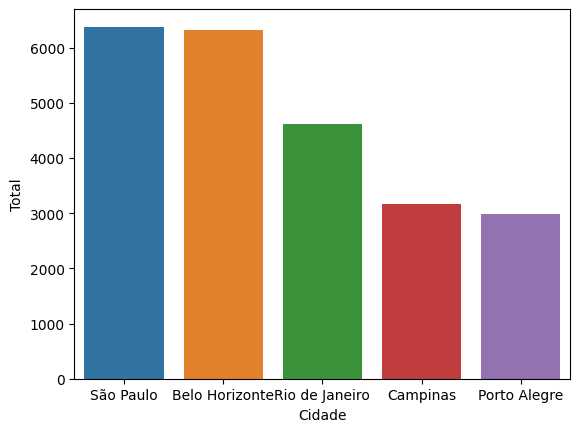

In [34]:
grafico = sns.barplot(data = agg_total,x = "Cidade",y= 'Total')

In [35]:
cidade_pet = aluguel_brasil.groupby('Cidade').size().reset_index()
cidade_pet

,Cidade,0
0,Belo Horizonte,1258
1,Campinas,853
2,Porto Alegre,1193
3,Rio de Janeiro,1501
4,São Paulo,5887


In [36]:
agg_pet = aluguel_brasil.groupby(['Cidade','Animais'])['Total'].agg('count').reset_index()
agg_pet.loc[agg_pet['Animais']=='acept']

,Cidade,Animais,Total
0,Belo Horizonte,acept,931
2,Campinas,acept,693
4,Porto Alegre,acept,1005
6,Rio de Janeiro,acept,1205
8,São Paulo,acept,4482


In [37]:
acept_pet = agg_pet.loc[agg_pet['Animais']=='acept']
acept_pet.head()
acept_pet.drop('Animais',axis=1,inplace= True)
acept_pet.head()

<ipython-input-37-edf087e739f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acept_pet.drop('Animais',axis=1,inplace= True)


,Cidade,Total
0,Belo Horizonte,931
2,Campinas,693
4,Porto Alegre,1005
6,Rio de Janeiro,1205
8,São Paulo,4482


In [38]:
acept_percent = aluguel_brasil.groupby(['Cidade']).agg(Numero = ('Cidade', 'count')).reset_index()
acept_percent

,Cidade,Numero
0,Belo Horizonte,1258
1,Campinas,853
2,Porto Alegre,1193
3,Rio de Janeiro,1501
4,São Paulo,5887


In [39]:
porcento_df = acept_pet.merge(acept_percent)
porcento_df

,Cidade,Total,Numero
0,Belo Horizonte,931,1258
1,Campinas,693,853
2,Porto Alegre,1005,1193
3,Rio de Janeiro,1205,1501
4,São Paulo,4482,5887


In [40]:
porcento_df["Porcento"] = porcento_df['Total'] / porcento_df['Numero']
porcento_df

,Cidade,Total,Numero,Porcento
0,Belo Horizonte,931,1258,0.74
1,Campinas,693,853,0.81
2,Porto Alegre,1005,1193,0.84
3,Rio de Janeiro,1205,1501,0.80
4,São Paulo,4482,5887,0.76


In [41]:
porcento_df["Porcento"] = porcento_df["Porcento"].apply(lambda x: f"{x*100:.2f}")

In [42]:
porcento_df["Porcento"] = porcento_df['Porcento'].astype('float')
porcento_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cidade    5 non-null      object 
 1   Total     5 non-null      int64  
 2   Numero    5 non-null      int64  
 3   Porcento  5 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 200.0+ bytes


In [43]:
porcento_df.head()

,Cidade,Total,Numero,Porcento
0,Belo Horizonte,931,1258,74.01
1,Campinas,693,853,81.24
2,Porto Alegre,1005,1193,84.24
3,Rio de Janeiro,1205,1501,80.28
4,São Paulo,4482,5887,76.13


In [23]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.6 MB/s eta 0:00:00


In [44]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [58]:
# Cidades mais pet friendly no DF (resultado em Porcentagem)
px.bar (porcento_df,x = "Cidade",y= 'Porcento')

In [46]:
# Filtrando os imóveis em São Paulo com base nas exigências do cliente e exibindo o resultado
aluguel_sp = aluguel_brasil.loc [(aluguel_brasil['Cidade'] == 'São Paulo') & (aluguel_brasil['Área'] <= 100) & (aluguel_brasil['Animais'] == 'acept') & (aluguel_brasil['Total'] <= 2000) & (aluguel_brasil['Mobiliado'] == 'furnished') & (aluguel_brasil['Valor Aluguel'] <= 1500) & (aluguel_brasil['Quartos'] == 2) & (aluguel_brasil['Andar'] <= '5') & (aluguel_brasil['Vagas de Garagem'] == 1)]
aluguel_sp

,Cidade,Área,Quartos,Banheiros,Vagas de Garagem,Andar,Animais,Mobiliado,Condomínio,Valor Aluguel,Imposto,Seguro,Total
2316,São Paulo,58.00,2,1,1,3,acept,furnished,383.00,1500.00,43.00,20.00,1946.00
4871,São Paulo,54.00,2,1,1,5,acept,furnished,600.00,1100.00,192.00,14.00,1906.00
8478,São Paulo,50.00,2,1,1,5,acept,furnished,505.00,1100.00,11.00,14.00,1630.00


In [47]:
aluguel_sp.loc[8478].reset_index()

,index,8478
0,Cidade,São Paulo
1,Área,50.00
2,Quartos,2
3,Banheiros,1
4,Vagas de Garagem,1
5,Andar,5
6,Animais,acept
7,Mobiliado,furnished
8,Condomínio,505.00
9,Valor Aluguel,1100.00


In [48]:
# Filtrando os imóveis em Campinas com base nas exigências do cliente e exibindo o resultado
aluguel_camp = aluguel_brasil.loc [(aluguel_brasil['Cidade'] == 'Campinas') & (aluguel_brasil['Área'] <= 100) & (aluguel_brasil['Animais'] == 'acept') & (aluguel_brasil['Total'] <= 2000) & (aluguel_brasil['Mobiliado'] == 'furnished') & (aluguel_brasil['Valor Aluguel'] <= 1500) & (aluguel_brasil['Quartos'] == 2) & (aluguel_brasil['Andar'] <= '5') & (aluguel_brasil['Vagas de Garagem'] == 1)]
aluguel_camp

,Cidade,Área,Quartos,Banheiros,Vagas de Garagem,Andar,Animais,Mobiliado,Condomínio,Valor Aluguel,Imposto,Seguro,Total
4628,Campinas,66.00,2,1,1,-,acept,furnished,340.00,1050.00,47.00,14.00,1451.00
5154,Campinas,57.00,2,1,1,1,acept,furnished,370.00,1000.00,36.00,13.00,1419.00


In [49]:
aluguel_camp.loc[4628].reset_index()

,index,4628
0,Cidade,Campinas
1,Área,66.00
2,Quartos,2
3,Banheiros,1
4,Vagas de Garagem,1
5,Andar,-
6,Animais,acept
7,Mobiliado,furnished
8,Condomínio,340.00
9,Valor Aluguel,1050.00


In [50]:
# Filtrando os imóveis no Rio de Janeiro com base nas exigências do cliente e exibindo o resultado
aluguel_rio = aluguel_brasil.loc [(aluguel_brasil['Cidade'] == 'Rio de Janeiro') & (aluguel_brasil['Área'] <= 100) & (aluguel_brasil['Animais'] == 'acept') & (aluguel_brasil['Total'] <= 2000) & (aluguel_brasil['Mobiliado'] == 'furnished') & (aluguel_brasil['Valor Aluguel'] <= 1500) & (aluguel_brasil['Quartos'] == 2) & (aluguel_brasil['Andar'] <= '5') & (aluguel_brasil['Vagas de Garagem'] == 1)]
aluguel_rio

,Cidade,Área,Quartos,Banheiros,Vagas de Garagem,Andar,Animais,Mobiliado,Condomínio,Valor Aluguel,Imposto,Seguro,Total
2931,Rio de Janeiro,53.00,2,1,1,4,acept,furnished,365.00,1239.00,0.00,16.00,1620.00
6892,Rio de Janeiro,75.00,2,1,1,4,acept,furnished,500.00,1360.00,33.00,18.00,1911.00
9404,Rio de Janeiro,50.00,2,1,1,5,acept,furnished,430.00,1150.00,9.00,15.00,1604.00


In [51]:
aluguel_rio.loc[2931].reset_index()

,index,2931
0,Cidade,Rio de Janeiro
1,Área,53.00
2,Quartos,2
3,Banheiros,1
4,Vagas de Garagem,1
5,Andar,4
6,Animais,acept
7,Mobiliado,furnished
8,Condomínio,365.00
9,Valor Aluguel,1239.00


In [52]:
# Filtrando os imóveis em Belo Horizonte com base nas exigências do cliente e exibindo o resultado
aluguel_bh = aluguel_brasil.loc [(aluguel_brasil['Cidade'] == 'Belo Horizonte') & (aluguel_brasil['Área'] <= 100) & (aluguel_brasil['Animais'] == 'acept') & (aluguel_brasil['Total'] <= 2000) & (aluguel_brasil['Mobiliado'] == 'furnished') & (aluguel_brasil['Valor Aluguel'] <= 1500) & (aluguel_brasil['Quartos'] == 2) & (aluguel_brasil['Andar'] <= '5') & (aluguel_brasil['Vagas de Garagem'] == 1)]
aluguel_bh

,Cidade,Área,Quartos,Banheiros,Vagas de Garagem,Andar,Animais,Mobiliado,Condomínio,Valor Aluguel,Imposto,Seguro,Total
4055,Belo Horizonte,60.00,2,1,1,1,acept,furnished,200.00,1040.00,0.00,14.00,1254.00
4568,Belo Horizonte,52.00,2,1,1,5,acept,furnished,253.00,1375.00,66.00,19.00,1713.00
6119,Belo Horizonte,77.00,2,1,1,2,acept,furnished,400.00,960.00,129.00,13.00,1502.00
8826,Belo Horizonte,45.00,2,1,1,4,acept,furnished,180.00,1300.00,39.00,18.00,1537.00
10395,Belo Horizonte,70.00,2,1,1,-,acept,furnished,0.00,1400.00,0.00,23.00,1423.00


In [53]:
aluguel_bh.loc[10395].reset_index()

,index,10395
0,Cidade,Belo Horizonte
1,Área,70.00
2,Quartos,2
3,Banheiros,1
4,Vagas de Garagem,1
5,Andar,-
6,Animais,acept
7,Mobiliado,furnished
8,Condomínio,0.00
9,Valor Aluguel,1400.00


In [54]:
# Filtrando os imóveis em Porto Alegre com base nas exigências do cliente e exibindo o resultado
aluguel_poa = aluguel_brasil.loc [(aluguel_brasil['Cidade'] == 'Porto Alegre') & (aluguel_brasil['Área'] <= 100) & (aluguel_brasil['Animais'] == 'acept') & (aluguel_brasil['Total'] <= 2000) & (aluguel_brasil['Mobiliado'] == 'furnished') & (aluguel_brasil['Valor Aluguel'] <= 1500) & (aluguel_brasil['Quartos'] == 2) & (aluguel_brasil['Andar'] <= '5') & (aluguel_brasil['Vagas de Garagem'] == 1)]
aluguel_poa

,Cidade,Área,Quartos,Banheiros,Vagas de Garagem,Andar,Animais,Mobiliado,Condomínio,Valor Aluguel,Imposto,Seguro,Total
772,Porto Alegre,55.00,2,1,1,-,acept,furnished,0.00,1300.00,34.00,24.00,1358.00
2433,Porto Alegre,60.00,2,1,1,1,acept,furnished,400.00,1300.00,25.00,19.00,1744.00
4209,Porto Alegre,50.00,2,1,1,-,acept,furnished,370.00,1290.00,30.00,17.00,1707.00
4969,Porto Alegre,70.00,2,1,1,2,acept,furnished,100.00,1360.00,100.00,20.00,1580.00
4987,Porto Alegre,90.00,2,1,1,2,acept,furnished,220.00,1350.00,53.00,20.00,1643.00
6110,Porto Alegre,50.00,2,1,1,3,acept,furnished,334.00,1300.00,16.00,19.00,1669.00
8801,Porto Alegre,48.00,2,1,1,10,acept,furnished,380.00,1100.00,27.00,17.00,1524.00
9152,Porto Alegre,67.00,2,2,1,2,acept,furnished,413.00,1240.00,55.00,19.00,1727.00


In [55]:
aluguel_poa.loc[4987].reset_index()

,index,4987
0,Cidade,Porto Alegre
1,Área,90.00
2,Quartos,2
3,Banheiros,1
4,Vagas de Garagem,1
5,Andar,2
6,Animais,acept
7,Mobiliado,furnished
8,Condomínio,220.00
9,Valor Aluguel,1350.00
